In [2]:
from os import listdir, path
from pyteomics import fasta
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
import time

In [3]:
fastafile = '/projects/mipt_dbmp_biotechnology/proteomics/sp_human_canonical_2023-09-06_shuffled.fasta'

In [4]:
! ls /projects/mipt_dbmp_biotechnology/proteomics/

closed_fragger.params  raw
fragger_scavager       sample_file.csv
hw		       sp_human_canonical_2023-09-06_shuffled.fasta
msfragger.sh	       sp_human_canonical_2023-09-06_shuffled.fasta.1.pepindex
mzML		       sp_human_canonical_2023-09-06_shuffled.fasta.2.pepindex
qreps


In [5]:
! ls /projects/mipt_dbmp_biotechnology/proteomics/hw

LUM2_00790_VG_6138K_1.raw  LUM2_00809_VG_6138A_4.raw  LUM2_00838_VG_4114K_4.raw
LUM2_00791_VG_6138K_2.raw  LUM2_00817_VG_4114B_1.raw  LUM2_00839_VG_4114K_5.raw
LUM2_00792_VG_6138K_3.raw  LUM2_00818_VG_4114B_2.raw  LUM2_00840_VG_4114K_6.raw
LUM2_00793_VG_6138K_4.raw  LUM2_00819_VG_4114B_3.raw  LUM2_00841_VG_4114K_7.raw
LUM2_00798_VG_6138B_1.raw  LUM2_00820_VG_4114B_4.raw  LUM2_00853_VG_4114A_1.raw
LUM2_00799_VG_6138B_2.raw  LUM2_00821_VG_4114B_5.raw  LUM2_00854_VG_4114A_2.raw
LUM2_00800_VG_6138B_3.raw  LUM2_00822_VG_4114B_6.raw  LUM2_00855_VG_4114A_3.raw
LUM2_00801_VG_6138B_4.raw  LUM2_00823_VG_4114B_7.raw  LUM2_00856_VG_4114A_4.raw
LUM2_00806_VG_6138A_1.raw  LUM2_00835_VG_4114K_1.raw  LUM2_00857_VG_4114A_5.raw
LUM2_00807_VG_6138A_2.raw  LUM2_00836_VG_4114K_2.raw  LUM2_00858_VG_4114A_6.raw
LUM2_00808_VG_6138A_3.raw  LUM2_00837_VG_4114K_3.raw  LUM2_00859_VG_4114A_7.raw


In [6]:
ls /projects/mipt_dbmp_biotechnology/proteomics/raw

LUM2_00709_VG_3821K_1.raw  LUM2_00721_VG_3821B_1.raw  LUM2_00740_VG_3821A_1.raw
LUM2_00710_VG_3821K_2.raw  LUM2_00722_VG_3821B_2.raw  LUM2_00741_VG_3821A_2.raw
LUM2_00711_VG_3821K_3.raw  LUM2_00723_VG_3821B_3.raw  LUM2_00742_VG_3821A_3.raw
LUM2_00712_VG_3821K_4.raw  LUM2_00724_VG_3821B_4.raw  LUM2_00743_VG_3821A_4.raw


# Конвертация сырых спектров в mzML (26 минут)
Сделаю только для домашних сырых файлов, для семинарского конвертация уже проведена (час 20!!!)

In [9]:
!pwd

/home/ekhajinova/homework


In [10]:
%%time
filedir = '/projects/mipt_dbmp_biotechnology/proteomics/hw/'
outdir = '/home/ekhajinova/homework/hw_2.3/mzML'
for file in listdir(filedir):
    if file.endswith('.raw') and file.replace('raw', 'mzML') not in listdir(outdir):
        path_to_file = path.join(filedir, file)
        !/projects/mipt_dbmp_biotechnology/soft/ThermoRawFileParser/ThermoRawFileParser -i $path_to_file -o $outdir

=2025-11-20 22:26:07 INFO Started parsing /projects/mipt_dbmp_biotechnology/proteomics/hw/LUM2_00800_VG_6138B_3.raw
2025-11-20 22:26:19 INFO Processing 84484 MS scans
10% 20% 30% 40% 50% 60% 70% 80% 90% 100% 

2025-11-20 22:28:40 INFO Finished parsing /projects/mipt_dbmp_biotechnology/proteomics/hw/LUM2_00800_VG_6138B_3.raw
2025-11-20 22:28:40 INFO Processing completed 0 errors, 0 warnings
=2025-11-20 22:28:41 INFO Started parsing /projects/mipt_dbmp_biotechnology/proteomics/hw/LUM2_00806_VG_6138A_1.raw
2025-11-20 22:28:51 INFO Processing 87115 MS scans
10% 20% 30% 40% 50% 60% 70% 80% 90% 100% 

2025-11-20 22:31:14 INFO Finished parsing /projects/mipt_dbmp_biotechnology/proteomics/hw/LUM2_00806_VG_6138A_1.raw
2025-11-20 22:31:14 INFO Processing completed 0 errors, 0 warnings
=2025-11-20 22:31:14 INFO Started parsing /projects/mipt_dbmp_biotechnology/proteomics/hw/LUM2_00817_VG_4114B_1.raw
2025-11-20 22:31:23 INFO Processing 84579 MS scans
10% 20% 30% 40% 50% 60% 70% 80% 90% 100% 

2

# Идентификация белков (на 32 Гб и 40 потоках 6 минут)

Запускаем MSFragger через slurm

# Пост-поисковая валидация (15 минут)

In [14]:
%%time
filedir = '/home/ekhajinova/homework/hw_2.3/mzML'
outdir = '/home/ekhajinova/homework/hw_2.3/fragger_scavager'
for file in listdir(filedir):
    filename = file.split('.')[0] 
    if file.endswith('.pepXML') and filename + '_protein_groups.tsv' not in listdir(outdir):
        print(file)
        path_to_pepxml = path.join(filedir, file)
        !scavager -p DECOY_ -db $fastafile -o $outdir $path_to_pepxml

LUM2_00840_VG_4114K_6.pepXML
     INFO: [00:26:39] 1 file(s) to process.
     INFO: [00:26:40] Loading file LUM2_00840_VG_4114K_6.pepXML...
     INFO: [00:26:52] Default target-decoy filtering, 1% PSM FDR: Number of target PSMs = 29377
     INFO: [00:26:52] Calibrating retention model...
     INFO: [00:27:15] RT model training results: R^2 = 0.852619 , std = 10.832415
     INFO: [00:27:15] Retention model calibrated successfully.
     INFO: [00:27:16] Starting machine learning...
     INFO: [00:28:39] Machine learning is finished.
     INFO: [00:28:44] Final results at 1.0% FDR level:
     INFO: [00:28:44] Identified PSMs: 30730
     INFO: [00:28:44] Identified peptides: 22324
     INFO: [00:28:44] Identified proteins: 4057
     INFO: [00:28:44] Identified protein groups: 3545
     INFO: [00:28:44] Processing finished.
     INFO: [00:28:47] Output tables saved.
     INFO: [00:29:00] Figures saved.
LUM2_00818_VG_4114B_2.pepXML
     INFO: [00:29:02] 1 file(s) to process.
     INFO: [00:2

# Количественный анализ + анализ дифференциальной экспресии

## Считаем число белков в фасте

In [15]:
i = 0
for p in fasta.read(fastafile):
    i+=1
print("Число настоящих белков в базе данных:",  i//2)

Число настоящих белков в базе данных: 20423


## Создаем sample-file

In [16]:
sample_df = pd.DataFrame(columns = ['File Name', 'SampleID'])
filedir = '/home/ekhajinova/homework/hw_2.3/fragger_scavager'
for file in listdir(filedir):
    if file.endswith('protein_groups.tsv'):
        name = file.split('_protein_groups')[0]
        sample = file.split('VG_')[1].split('_')[0]
        tmp_dict = {'File Name': [file],
                    'SampleID':[sample]}
        sample_df = pd.concat([sample_df, pd.DataFrame.from_dict(tmp_dict)])
sample_df.to_csv('/home/ekhajinova/homework/hw_2.3/fragger_scavager/sample_file.csv')

In [17]:
sample_df

,File Name,SampleID
0,LUM2_00791_VG_6138K_2_protein_groups.tsv,6138K
0,LUM2_00820_VG_4114B_4_protein_groups.tsv,4114B
0,LUM2_00806_VG_6138A_1_protein_groups.tsv,6138A
0,LUM2_00854_VG_4114A_2_protein_groups.tsv,4114A
0,LUM2_00857_VG_4114A_5_protein_groups.tsv,4114A
0,LUM2_00809_VG_6138A_4_protein_groups.tsv,6138A
0,LUM2_00836_VG_4114K_2_protein_groups.tsv,4114K
0,LUM2_00801_VG_6138B_4_protein_groups.tsv,6138B
0,LUM2_00793_VG_6138K_4_protein_groups.tsv,6138K
0,LUM2_00853_VG_4114A_1_protein_groups.tsv,4114A


+ семинар

In [19]:
my_df = pd.read_csv('/home/ekhajinova/homework/hw_2.3/fragger_scavager/sample_file.csv', index_col=0)
shared_df = pd.read_csv('/projects/mipt_dbmp_biotechnology/proteomics/sample_file.csv', index_col=0)
combined_df = pd.concat([my_df, shared_df], ignore_index=True)
combined_df.to_csv('/home/ekhajinova/homework/hw_2.3/fragger_scavager/sample_file_combined.csv', index=False)

In [20]:
combined_df

,File Name,SampleID
0,LUM2_00791_VG_6138K_2_protein_groups.tsv,6138K
1,LUM2_00820_VG_4114B_4_protein_groups.tsv,4114B
2,LUM2_00806_VG_6138A_1_protein_groups.tsv,6138A
3,LUM2_00854_VG_4114A_2_protein_groups.tsv,4114A
4,LUM2_00857_VG_4114A_5_protein_groups.tsv,4114A
5,LUM2_00809_VG_6138A_4_protein_groups.tsv,6138A
6,LUM2_00836_VG_4114K_2_protein_groups.tsv,4114K
7,LUM2_00801_VG_6138B_4_protein_groups.tsv,6138B
8,LUM2_00793_VG_6138K_4_protein_groups.tsv,6138K
9,LUM2_00853_VG_4114A_1_protein_groups.tsv,4114A


In [16]:
combined_df['SampleID'].unique()

array(['6138K', '4114B', '6138A', '4114A', '4114K', '6138B', '3821K',
       '3821A', '3821B'], dtype=object)

In [26]:
cp /projects/mipt_dbmp_biotechnology/proteomics/fragger_scavager/* /home/ekhajinova/homework/hw_2.3/fragger_scavager

In [27]:
filedir = '/home/ekhajinova/homework/hw_2.3/fragger_scavager'
sample_file = '/home/ekhajinova/homework/hw_2.3/fragger_scavager/sample_file_combined.csv'
outdir = '/home/ekhajinova/homework/hw_2.3/qreps'

labels = '3821A,3821K 3821B,3821K 4114A,4114K 4114B,4114K 6138A,6138K 6138B,6138K'

!qreps --sample-file $sample_file --labels $labels\
    --input-dir $filedir --output-dir $outdir\
    --imputation kNN --thresholds semi-dynamic --alpha 0.01 --regulation UP\
    --fasta-size 20423 --species 9606 --report True

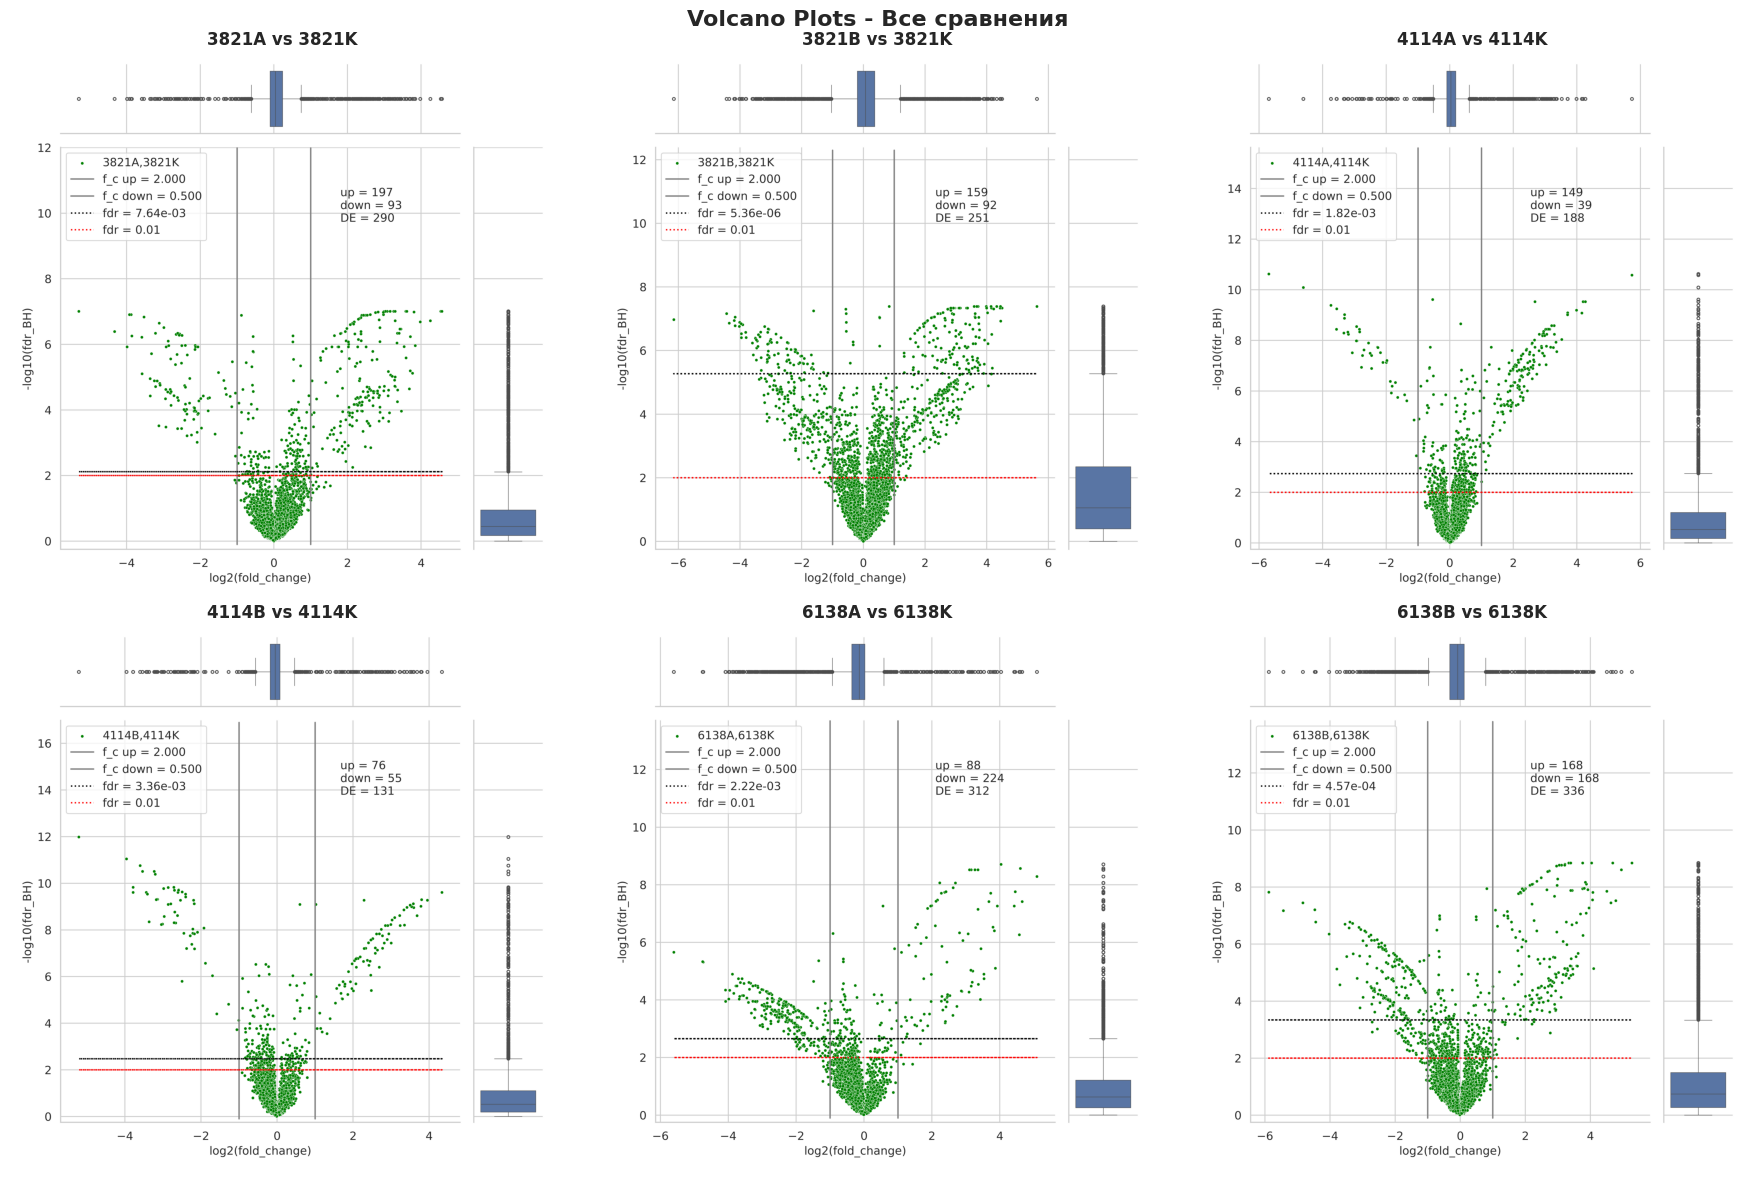

In [28]:
import matplotlib.image as mpimg
import os
outdir = '/home/ekhajinova/homework/hw_2.3/qreps'

volcano_files = [f for f in os.listdir(outdir) if f.startswith('volcano_') and f.endswith('.png')]
volcano_files.sort()

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Volcano Plots - Все сравнения', fontsize=16, fontweight='bold')

for i, volcano_file in enumerate(volcano_files):
    row = i // 3
    col = i % 3
    img = mpimg.imread(os.path.join(outdir, volcano_file))
    
    axes[row, col].imshow(img)
    axes[row, col].set_title(volcano_file.replace('volcano_', '').replace('.png', '').replace('_', ' vs '), 
                           fontsize=12, fontweight='bold')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

## Go enrichment analysis

Сайт string-db.org, списки генов в файлах DRG. 

In [25]:
outdir = '/home/ekhajinova/homework/hw_2.3/qreps'

drg_files = [f for f in os.listdir(outdir) if f.startswith('DRG_') and f.endswith('.tsv')]
drg_files.sort()

for drg_file in drg_files:
    df = pd.read_csv(os.path.join(outdir, drg_file), sep='\t')
    comparison = drg_file.replace('DRG_', '').replace('.tsv', '')
    
    # Получаем уникальные гены
    genes = df['Gene'].dropna().unique()
    
    # Создаем DataFrame с генами
    genes_df = pd.DataFrame({'Gene': sorted(genes)})
    
    # Сохраняем в CSV
    output_file = os.path.join(outdir, f"{comparison}_genes.csv")
    genes_df.to_csv(output_file, index=False, header=False)
    
    print(f"Создан файл: {output_file}")
    print(f"Количество генов: {len(genes)}")

Создан файл: /home/ekhajinova/homework/hw_2.3/qreps/3821A_3821K_genes.csv
Количество генов: 197
Создан файл: /home/ekhajinova/homework/hw_2.3/qreps/3821B_3821K_genes.csv
Количество генов: 159
Создан файл: /home/ekhajinova/homework/hw_2.3/qreps/4114A_4114K_genes.csv
Количество генов: 149
Создан файл: /home/ekhajinova/homework/hw_2.3/qreps/4114B_4114K_genes.csv
Количество генов: 76
Создан файл: /home/ekhajinova/homework/hw_2.3/qreps/6138A_6138K_genes.csv
Количество генов: 88
Создан файл: /home/ekhajinova/homework/hw_2.3/qreps/6138B_6138K_genes.csv
Количество генов: 168


## Post enrichment

## Визуализация топ10 терминов для каждой категории

Это результат для семинарских данных, дальше покажу, что он совпадает с моими результатами:

In [39]:
ls /projects/mipt_dbmp_biotechnology/proteomics/qreps

DRG_3821A_3821K.tsv      NaN_distribution_3821A.png  report.txt
DRG_3821B_3821K.tsv      NaN_distribution_3821B.png  volcano_3821A_3821K.png
enrichment.all.tsv       NaN_distribution_3821K.png  volcano_3821B_3821K.png
metrics_3821A_3821K.tsv  Quant_res_3821A_3821K.tsv
metrics_3821B_3821K.tsv  Quant_res_3821B_3821K.tsv


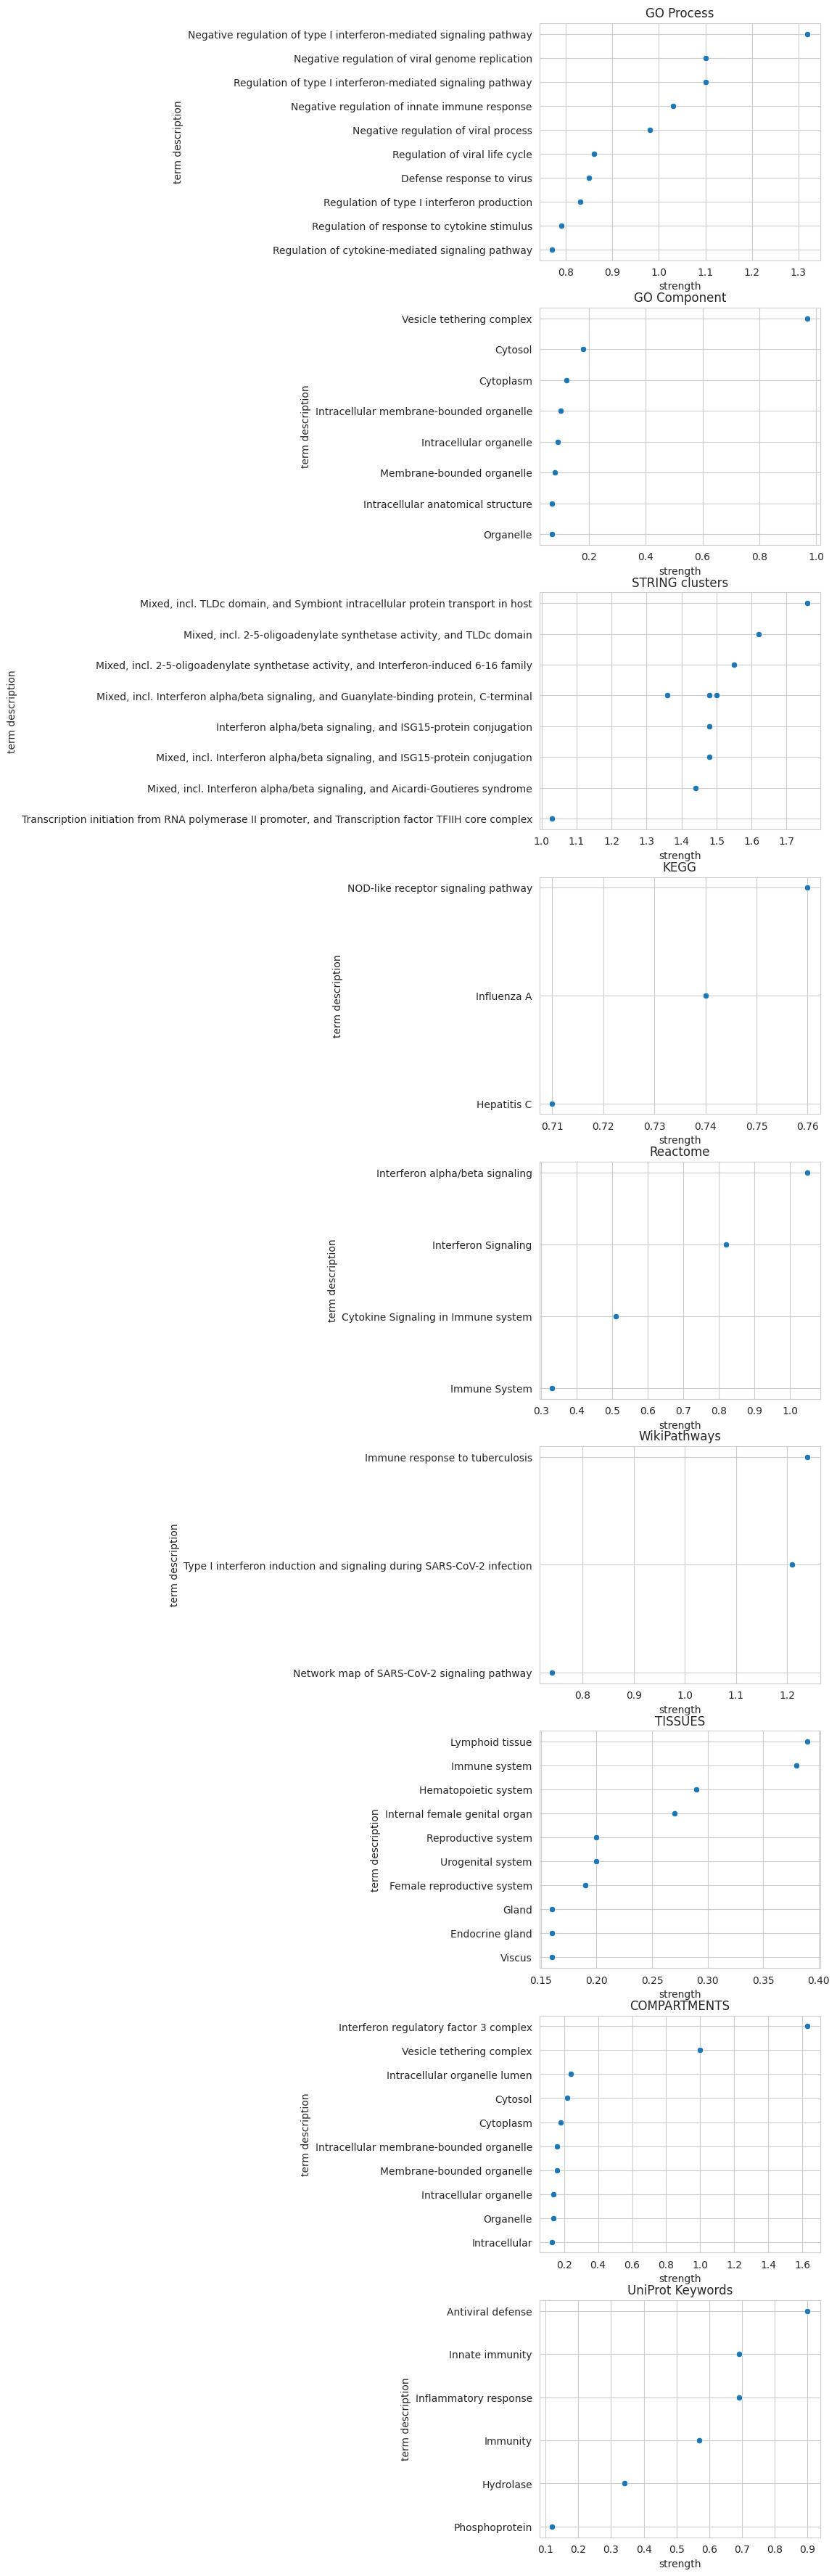

In [38]:
filedir = '/projects/mipt_dbmp_biotechnology/proteomics/qreps'
for file in listdir(filedir):
    if file.startswith('enrichment'):
        df = pd.read_csv(path.join(filedir, file), sep = '\t')
        cats = df['#category'].unique()
        f, ax = plt.subplots(len(cats), 1, figsize = (5, 45))
        i = 0
        for c in cats:
            tmp = df[df['#category'] == c]
            tmp = tmp.sort_values(by = 'strength', ascending = False)
            sns.scatterplot(x = 'strength', y = 'term description', data = tmp.head(10), ax = ax[i])
            ax[i].set_title(c)
            i+=1

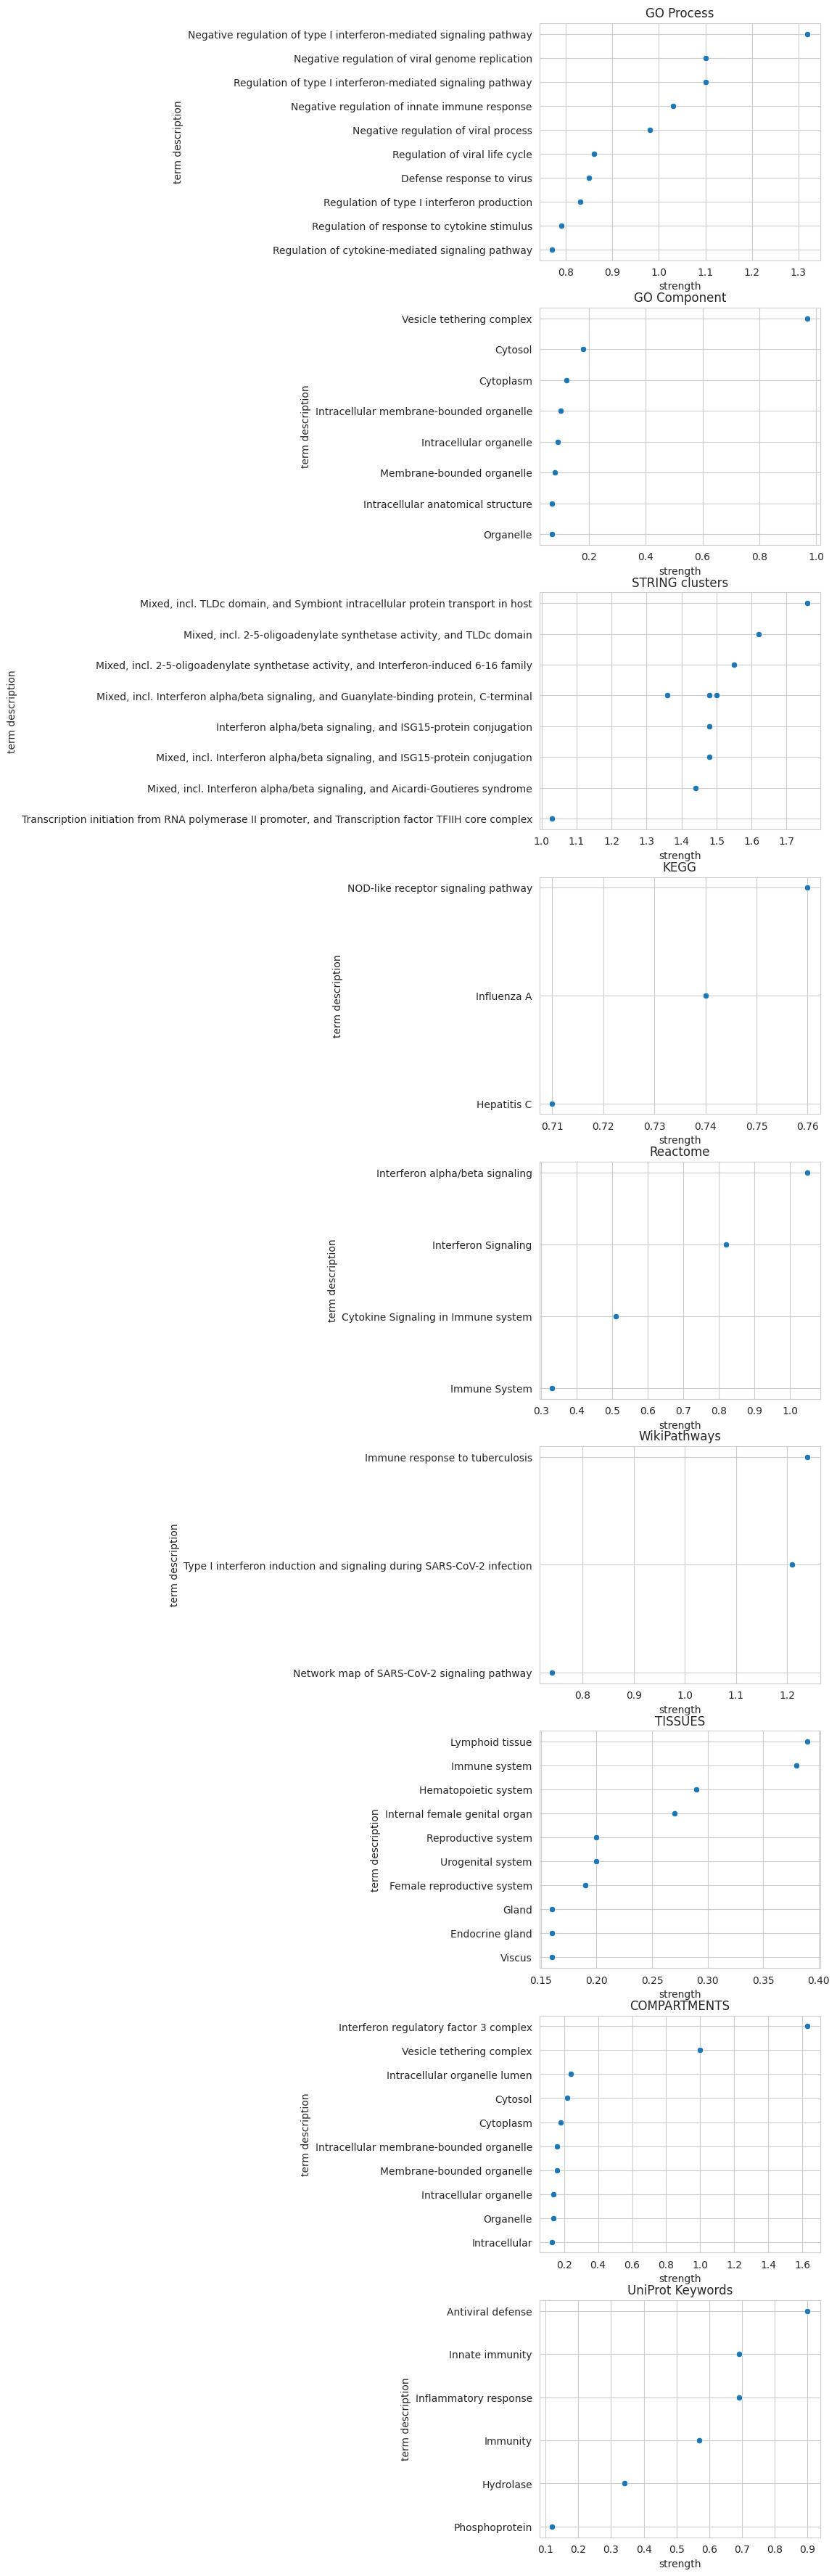

In [41]:
df = '/home/ekhajinova/homework/hw_2.3/qreps'
for file in listdir(filedir):
    if file.startswith('enrichment'):
        df = pd.read_csv(path.join(filedir, file), sep = '\t')
        cats = df['#category'].unique()
        f, ax = plt.subplots(len(cats), 1, figsize = (5, 45))
        i = 0
        for c in cats:
            tmp = df[df['#category'] == c]
            tmp = tmp.sort_values(by = 'strength', ascending = False)
            sns.scatterplot(x = 'strength', y = 'term description', data = tmp.head(10), ax = ax[i])
            ax[i].set_title(c)
            i+=1